In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import random
import torch

warnings.filterwarnings("ignore")

In [2]:
os.listdir("../task_3")

['Задача3. Датасет 2. Тестовый.csv',
 'catboost_info',
 'sample_submission_3.csv',
 'model.py',
 'plotting.py',
 'keras_modeling.ipynb',
 'predict_point_4.ipynb',
 'compute_metric_3.py',
 'ds3.csv',
 '__pycache__',
 'eda_task3.ipynb',
 'res.csv',
 'README.md',
 'ds31667102504.csv',
 'Задача3. Датасет 3. Контрольный для участников.csv',
 'ds3_.csv',
 'Задача3. Датасет 1. Тренировочный.csv']

In [3]:
def seed_everything(seed=7575):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.random.manual_seed(seed)


seed_everything()

In [4]:
train_data = pd.read_csv("Задача3. Датасет 1. Тренировочный.csv", encoding="cp1251", sep=';', skiprows=[1, 2])


### TRAIN

In [5]:
# train_data['Параметр'] = pd.to_datetime(train_data['Параметр'], infer_datetime_format=True)

In [6]:
train_data[train_data['Маркер'] == 2]

,Параметр,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х063,х064,х065,х066,х067,х068,х069,х070,х071,Маркер
178271,18.06.2019 8:21,188.633,23.6,50.029,50.009,3001.733,50.009,65.4,63.6,69.3,...,72.1,70.3,67.5,67.9,3200.0,36.7,39.8,41.9,25.8,2


НЕ ФИЧИ:

х001
х002
х003, х004, х006
х005
х007
х060, х061, х062, х063, х064, х065, х066, х067, х068, х069, х070, х071

ТОЧНО ФИЧИ ВЛИЯЮТ:
х008, х009, х010, х014, х015, х016, х017, х020,х023, х024, х025, х026, х030 - падение значения
х011, х012, х013, х018, х019, х020, х021, х027, х028, х029, х057, х058, х059  - рост

In [66]:
increase = ['х011', 'х012', 'х013', 'х018', 'х019', 'х020', 'х021', 'х027', 'х028', 'х029', 'х057', 'х058', 'х059']
decrease = ['х008', 'х009', 'х010', 'х014', 'х015', 'х016', 'х017', 'х023', 'х024', 'х025', 'х026', 'х030']

Среднее значение фичи х027 по всему ряду 52.575468008292056
Значение фичи х027 в точке 54.2


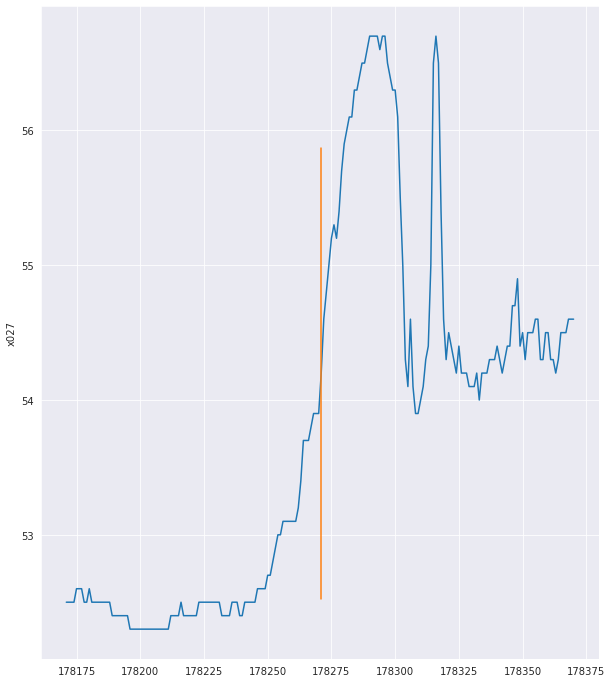

In [10]:
feat = "х027"

std_feat = train_data[feat].std()
print(f'Среднее значение фичи {feat} по всему ряду {train_data[feat].mean()}')
print(f'Значение фичи {feat} в точке {train_data.loc[178271, feat]}')

plt.figure(figsize=(10, 12))
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y=feat)

plt.plot([178271, 178271], [train_data.loc[178271, feat] - std_feat, train_data.loc[178271, feat] + std_feat])

plt.show()

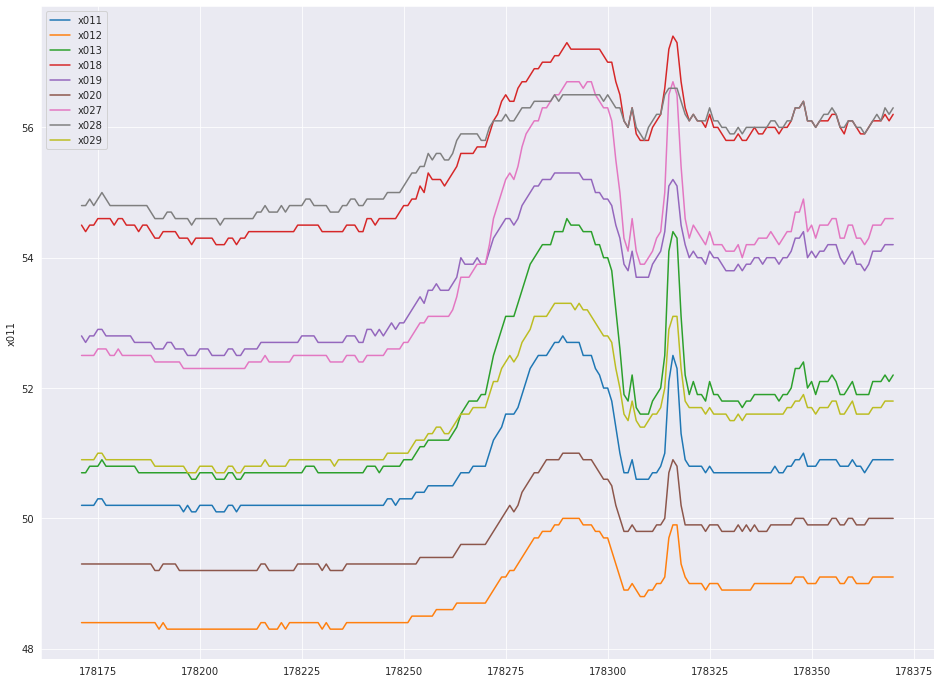

In [34]:

plt.figure(figsize=(16, 12))
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х011', label='х011')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х012', label='х012')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х013', label='х013')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х018', label='х018')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х019', label='х019')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х020', label='х020')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х027', label='х027')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х028', label='х028')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х029', label='х029')

plt.legend()
# plt.plot([178271, 178271], [train_data.loc[178271, feat] - std_feat, train_data.loc[178271, feat] + std_feat])

plt.show()

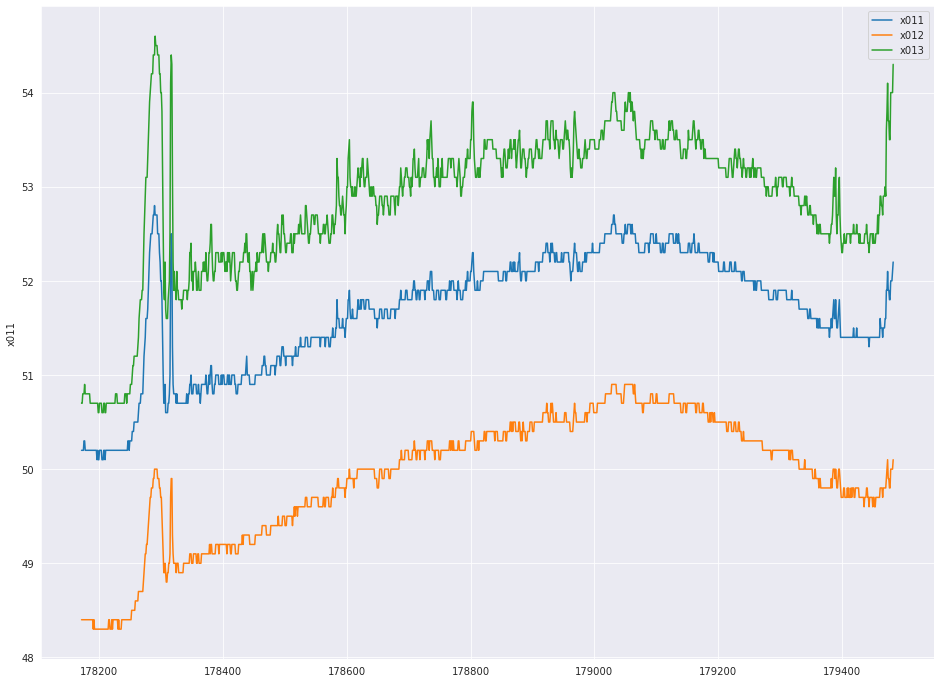

In [82]:
plt.figure(figsize=(16, 12))
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х011', label='х011')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х012', label='х012')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х013', label='х013')

plt.legend()
# plt.plot([178271, 178271], [train_data.loc[178271, feat] - std_feat, train_data.loc[178271, feat] + std_feat])

plt.show()

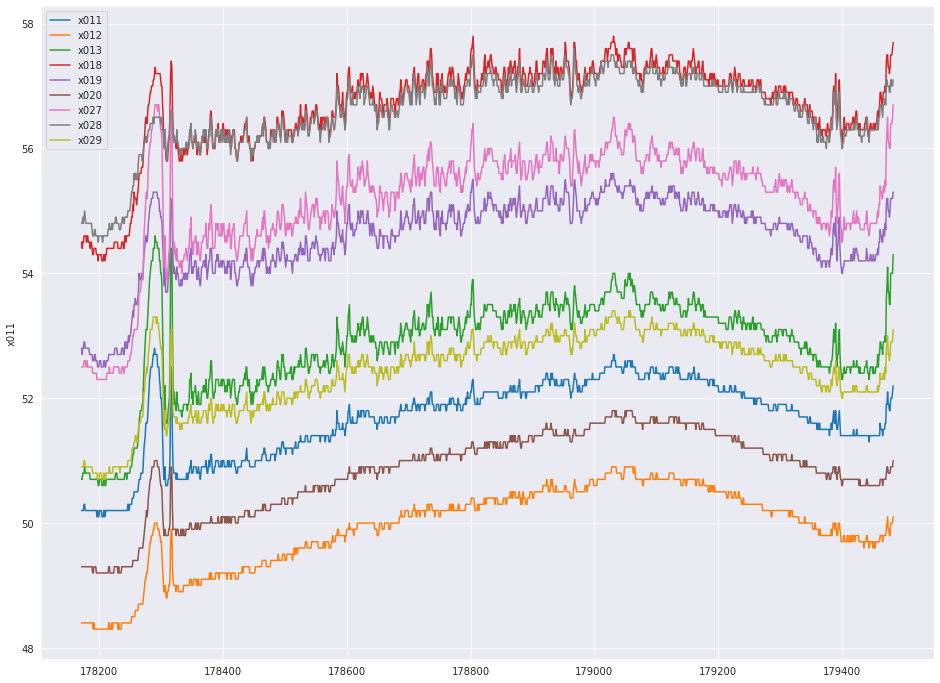

In [84]:

plt.figure(figsize=(16, 12))
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х011', label='х011')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х012', label='х012')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х013', label='х013')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х018', label='х018')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х019', label='х019')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х020', label='х020')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х027', label='х027')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х028', label='х028')
sns.lineplot(data=train_data[178271 - 100:], x=train_data[178271 - 100:].index, y='х029', label='х029')

plt.legend()
# plt.plot([178271, 178271], [train_data.loc[178271, feat] - std_feat, train_data.loc[178271, feat] + std_feat])

plt.show()

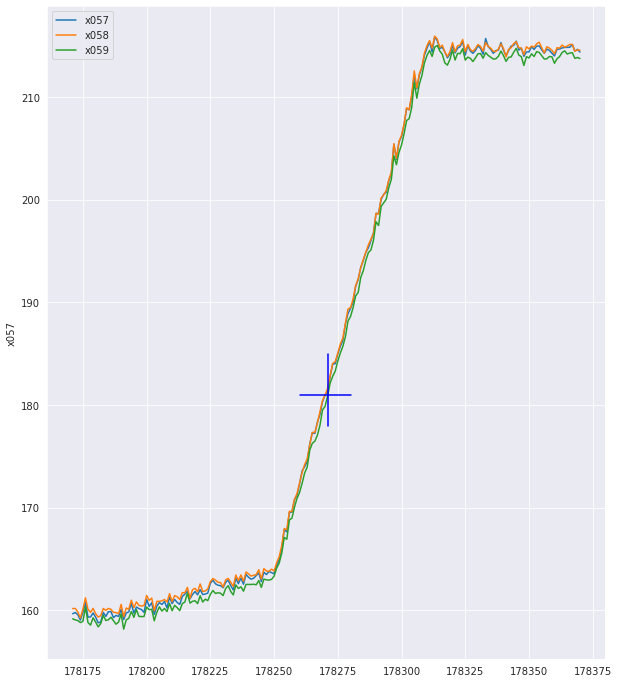

In [51]:

plt.figure(figsize=(10, 12))
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х057', label='х057')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х058', label='х058')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х059', label='х059')

# plt.plot(178271,181.333,'+', lw=2)
plt.plot([178271, 178271], [178, 185], color='b')
plt.plot([178260, 178280], [181, 181], color='b')

plt.legend()
plt.show()

<AxesSubplot:>

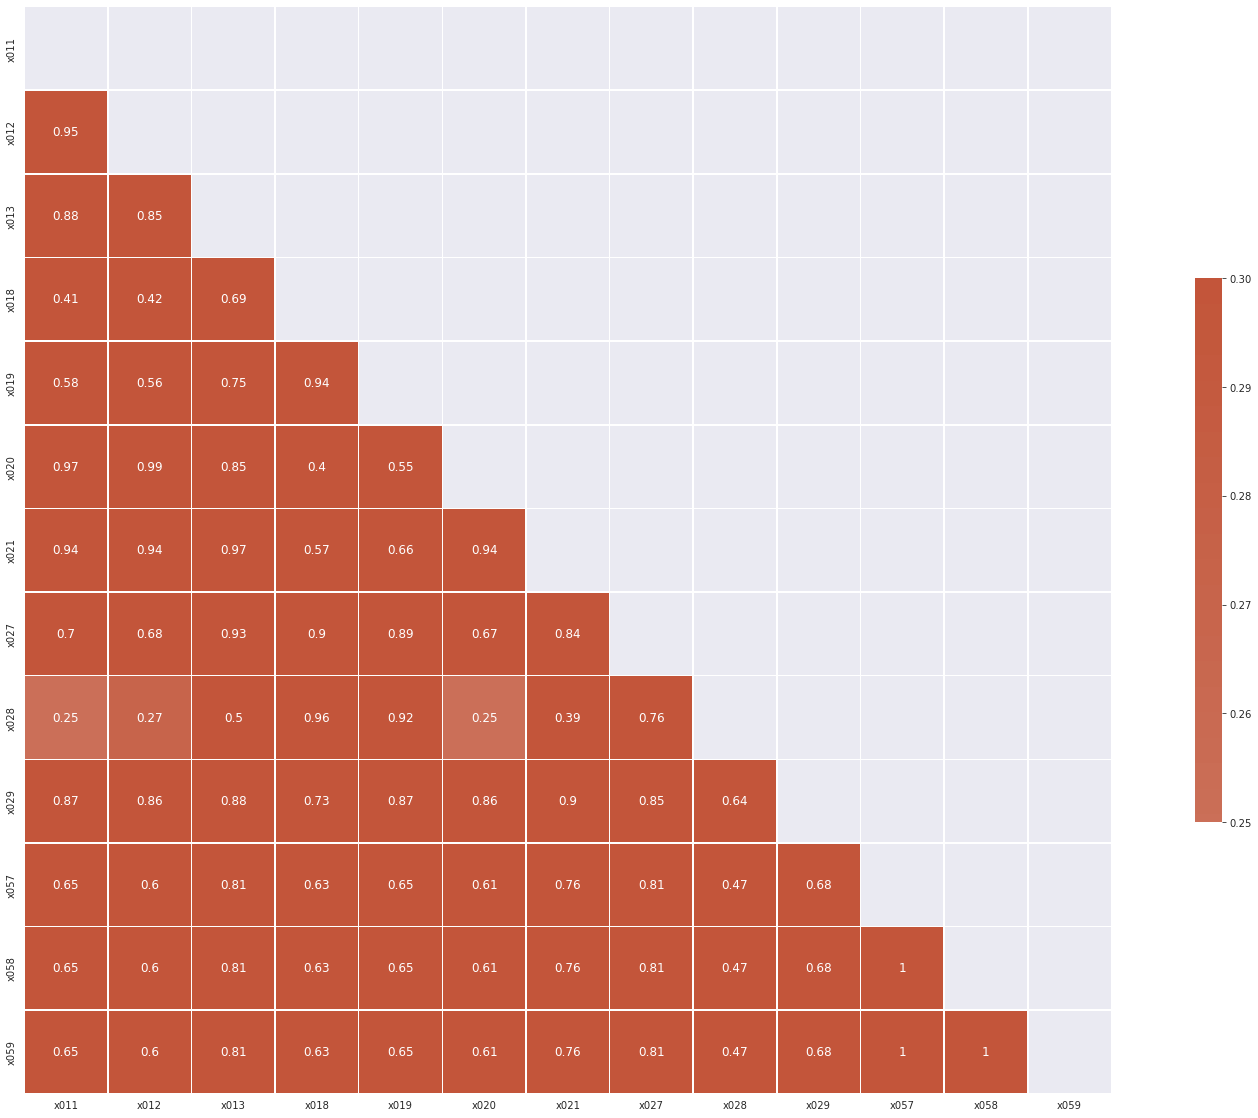

In [86]:
plt.figure(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_data.loc[:, increase].corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_data.loc[:, increase].corr().round(2),
            mask=mask, cmap=cmap, vmax=.3,
            center=0, annot=True, annot_kws={'size': 12},
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, )

### Decrease

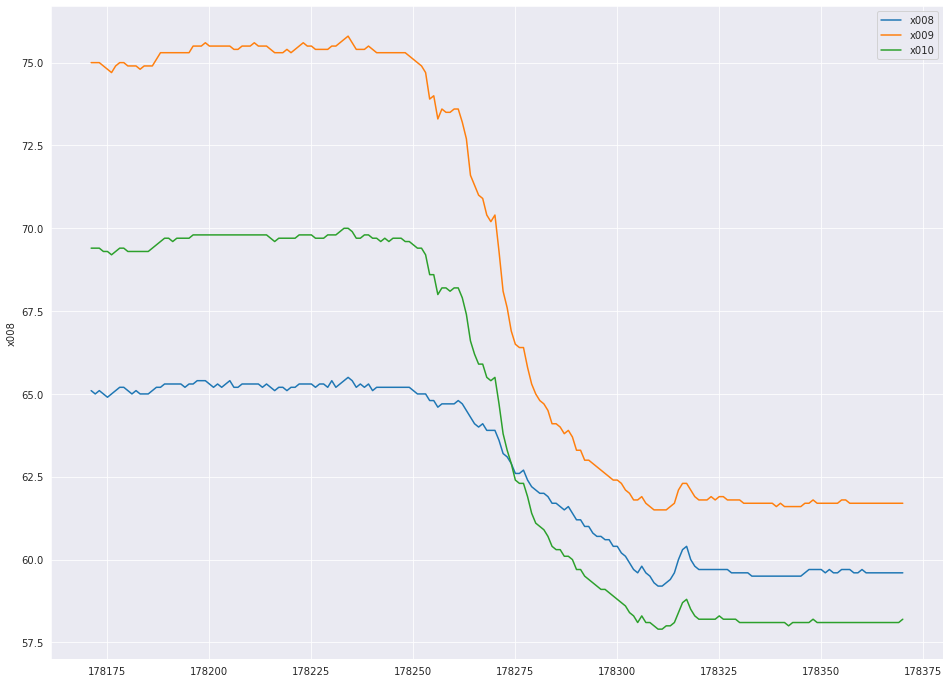

In [64]:
plt.figure(figsize=(16, 12))
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х008', label='х008')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х009', label='х009')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х010', label='х010')


plt.legend()
# plt.plot([178271, 178271], [train_data.loc[178271, feat] - std_feat, train_data.loc[178271, feat] + std_feat])

plt.show()

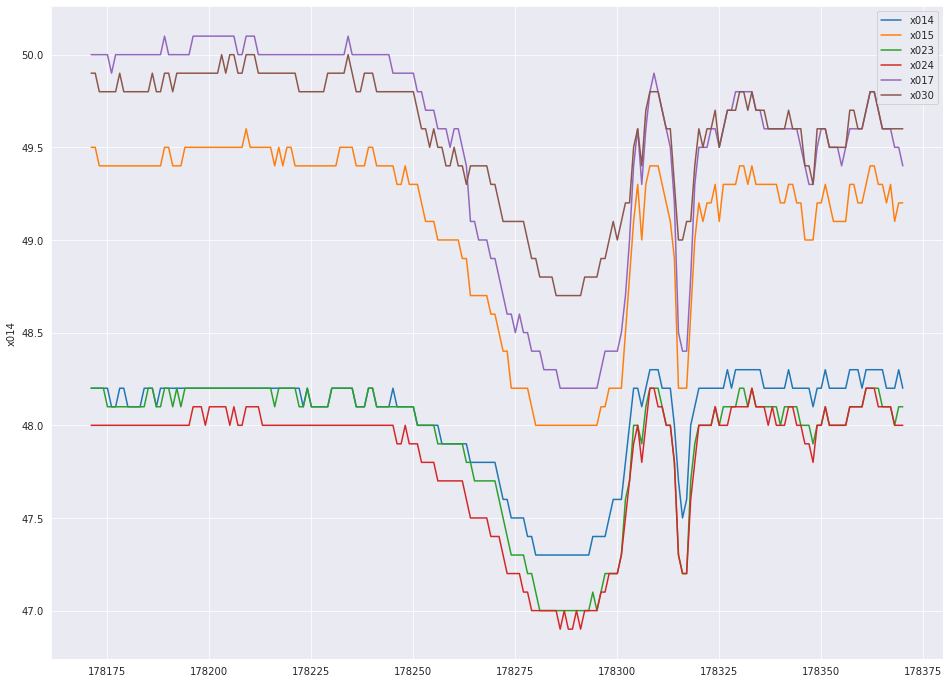

In [80]:
plt.figure(figsize=(16, 12))

sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х014', label='х014')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х015', label='х015')

sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х023', label='х023')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х024', label='х024')

sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х017', label='х017')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х030', label='х030')

plt.legend()
# plt.plot([178271, 178271], [train_data.loc[178271, feat] - std_feat, train_data.loc[178271, feat] + std_feat])

plt.show()

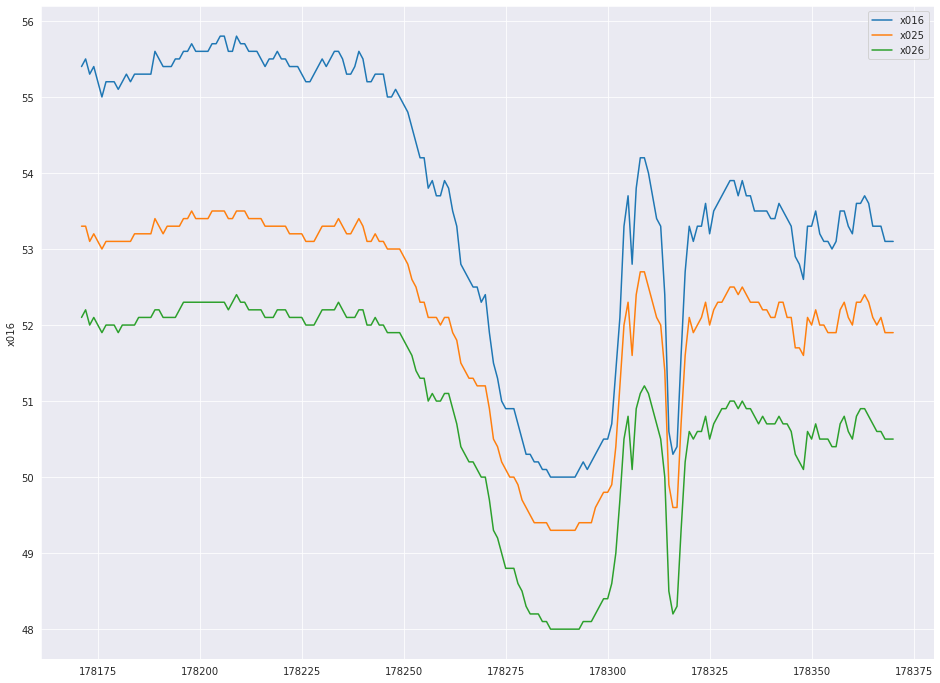

In [76]:
plt.figure(figsize=(16, 12))

sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х016', label='х016')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х025', label='х025')
sns.lineplot(data=train_data[178271 - 100:178271 + 100], x=train_data[178271 - 100:178271 + 100].index, y='х026', label='х026')

plt.legend()

plt.show()

<AxesSubplot:>

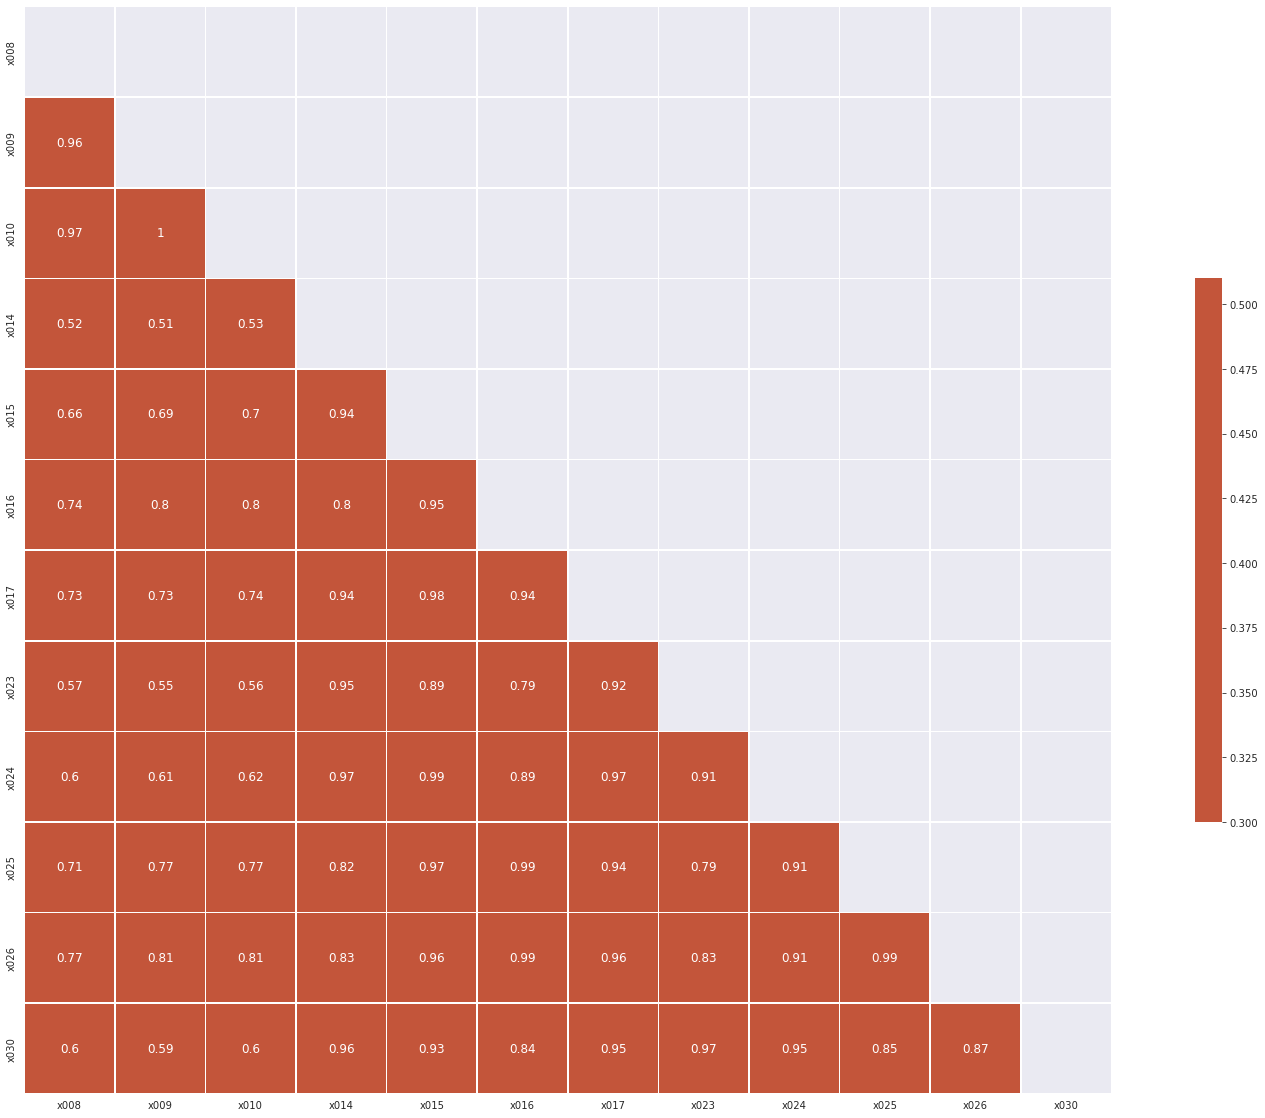

In [89]:
plt.figure(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_data.loc[:, decrease].corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_data.loc[:, decrease].corr().round(2),
            mask=mask, cmap=cmap, vmax=.3,
            center=0, annot=True, annot_kws={'size': 12},
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, )

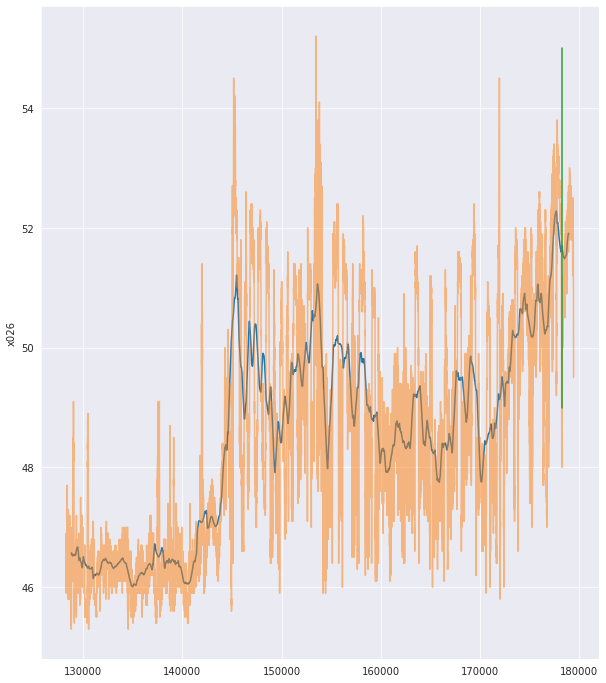

In [16]:
# Лаг 30?
feat = "х026"
plt.figure(figsize=(10, 12))
sns.lineplot(data=train_data[178271 - 50000:].rolling(window=1000, center=True).mean(),
             x=train_data[178271 - 50000:].index, y=feat)

sns.lineplot(data=train_data[178271 - 50000:], x=train_data[178271 - 50000:].index, y=feat, alpha=.5)

plt.plot([178271, 178271], [49, 55])

plt.show()

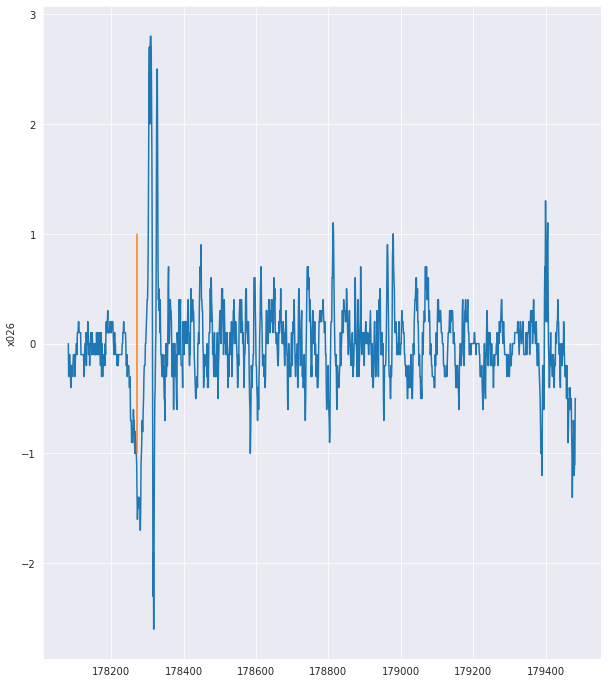

In [52]:
# Лаг 30?
feat = "х026"
plt.figure(figsize=(10, 12))
sns.lineplot(data=train_data[178271 - 200:].diff(10), x=train_data[178271 - 200:].index, y=feat)
plt.plot([178271, 178271], [-1, 1])

plt.show()

<AxesSubplot:>

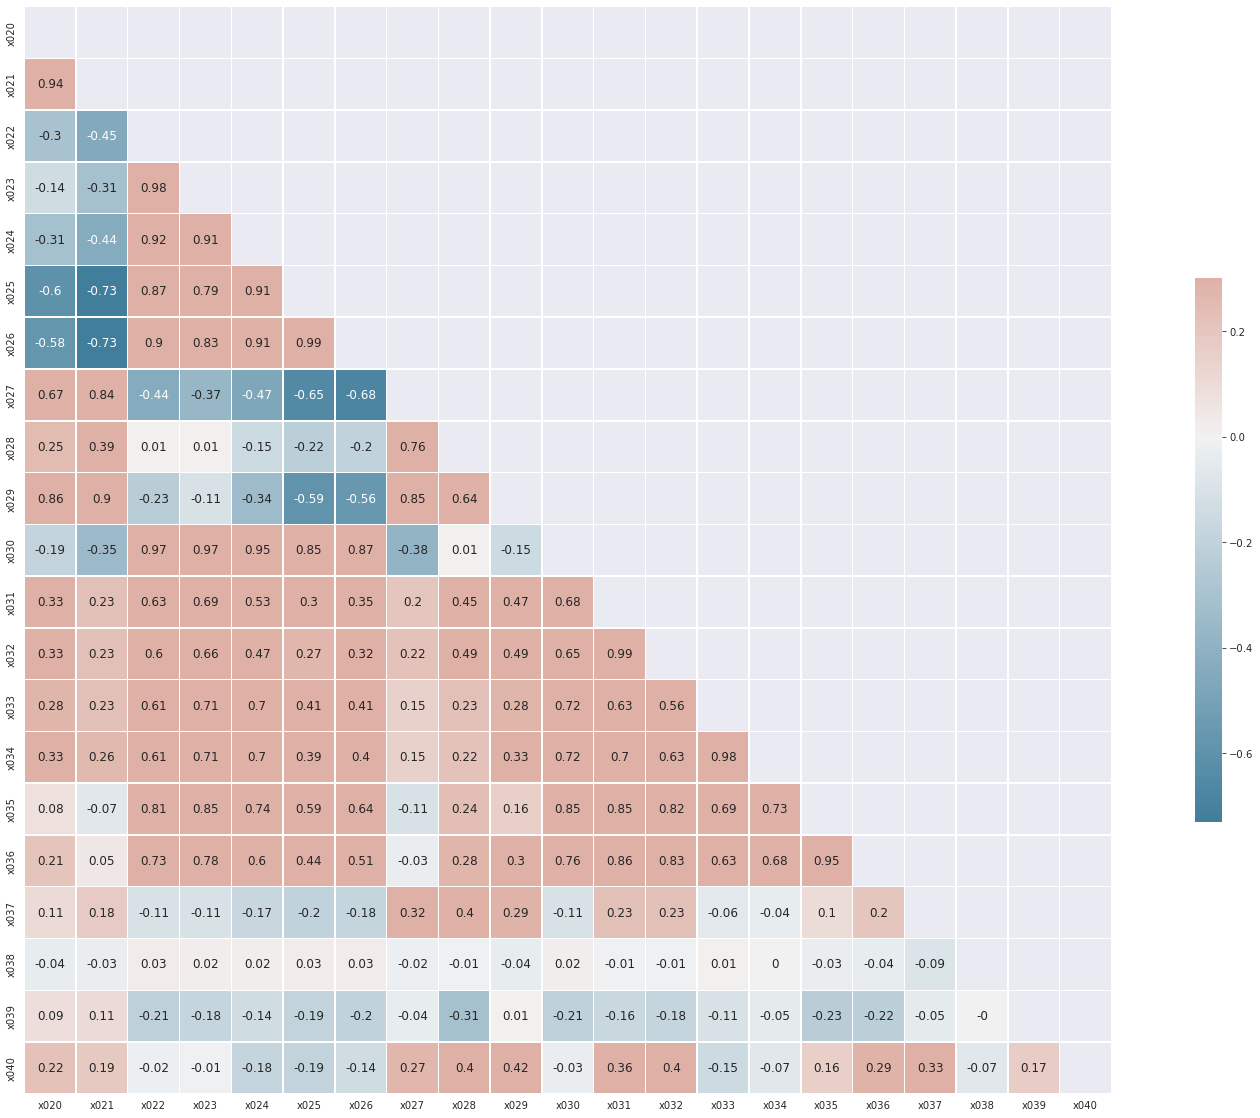

In [87]:
plt.figure(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_data.loc[:, "х020":"х040"].corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_data.loc[:, "х020":"х040"].corr().round(2),
            mask=mask, cmap=cmap, vmax=.3,
            center=0, annot=True, annot_kws={'size': 12},
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, )

### VAL

In [6]:
val_data = pd.read_csv("Задача3. Датасет 2. Тестовый.csv", encoding="cp1251", sep=';', skiprows=[1, 2])

val_data = val_data.rename(columns={'Unnamed: 0': "Параметр"})
# val_data['Параметр'] = pd.to_datetime(val_data['Параметр'], infer_datetime_format=True)
val_data

,Параметр,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х063,х064,х065,х066,х067,х068,х069,х070,х071,Маркер
0,01.09.2019,189.346,22.1,50.030,50.009,3002.125,50.008,69.1,61.7,63.4,...,72.3,71.3,68.5,68.7,3276.7,39.1,41.9,42.7,25.2,1
1,01.09.2019 0:01,189.346,22.1,50.014,49.995,3000.567,49.996,69.8,61.5,63.2,...,72.3,71.3,68.5,68.8,3276.7,39.0,41.9,42.7,25.2,1
2,01.09.2019 0:02,189.346,22.1,50.032,50.011,3002.355,50.010,69.3,61.5,63.2,...,72.3,71.3,68.5,68.8,3276.7,39.1,41.9,42.7,25.2,1
3,01.09.2019 0:03,189.346,22.1,50.025,50.006,3001.755,50.006,69.7,61.8,63.6,...,72.3,71.3,68.5,68.8,3276.7,39.1,41.9,42.7,25.2,1
4,01.09.2019 0:04,189.346,22.1,50.036,50.018,3002.030,50.018,69.5,62.4,64.1,...,72.4,71.2,68.5,68.8,3276.7,39.1,41.9,42.7,25.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6868,05.09.2019 18:28,190.401,23.9,50.025,50.006,3001.563,50.003,67.3,62.4,64.1,...,72.2,72.4,69.7,69.8,3276.7,40.7,43.5,44.7,27.0,3
6869,05.09.2019 18:29,190.401,23.9,50.019,49.999,3000.999,50.000,73.8,62.5,64.2,...,72.2,72.4,69.6,69.7,3276.7,40.7,43.5,44.7,27.0,3
6870,05.09.2019 18:30,190.401,23.9,50.034,50.013,3001.733,50.013,74.6,62.5,64.3,...,72.3,72.4,69.6,69.8,3276.7,40.7,43.5,44.7,27.0,3
6871,05.09.2019 18:31,190.401,23.9,50.031,50.011,3001.939,50.011,74.7,62.3,64.1,...,72.2,72.4,69.6,66.4,3276.7,40.7,43.5,44.7,27.0,3


In [5]:
val_data[val_data['Маркер'] == 2]

,Параметр,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х063,х064,х065,х066,х067,х068,х069,х070,х071,Маркер
6373,05.09.2019 10:13,190.401,23.0,50.015,50.004,3000.596,50.003,62.7,67.7,75.7,...,70.8,71.8,69.0,67.4,3276.7,39.4,42.4,43.7,26.1,2


Среднее значение фичи х026 по всему ряду 52.28502837188981
Значение фичи х026 в точке 51.9


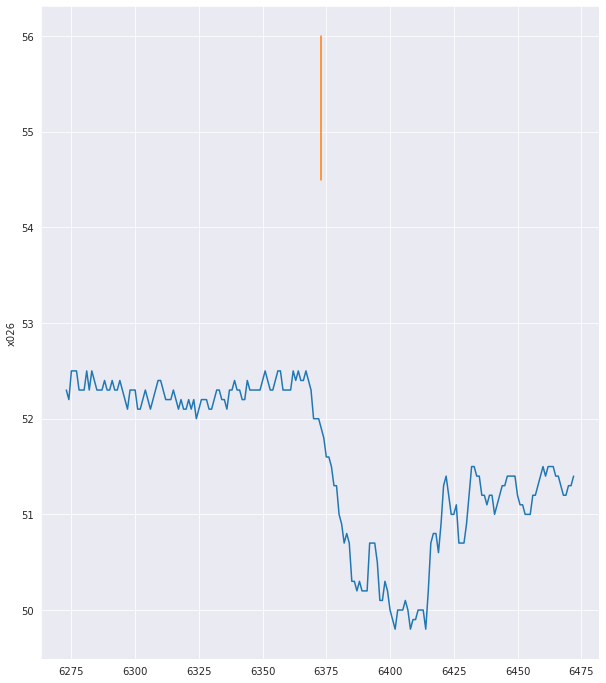

In [45]:
feat = "х026"
print(f'Среднее значение фичи {feat} по всему ряду {val_data[feat].mean()}')
print(f'Значение фичи {feat} в точке {val_data.loc[6373, feat]}')

plt.figure(figsize=(10, 12))
sns.lineplot(data=val_data[6373 - 100:6373 + 100], x=val_data[6373 - 100:6373 + 100].index, y=feat)

plt.plot([6373, 6373], [54.5, 56])

plt.show()

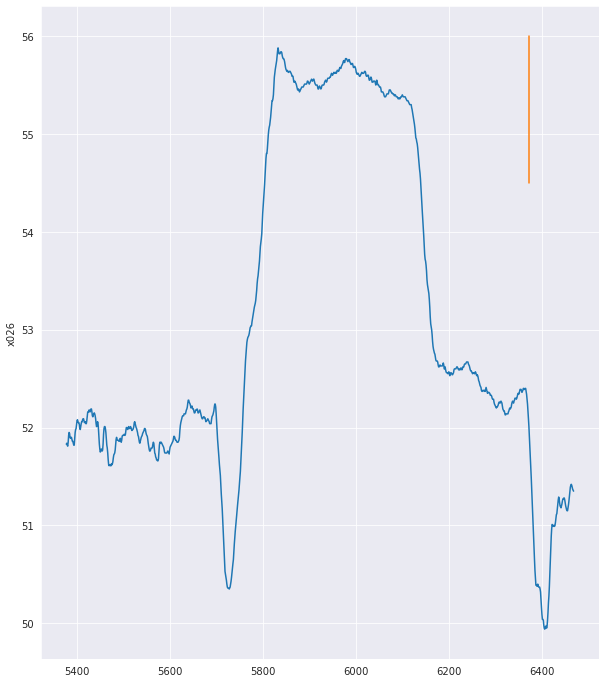

In [46]:
# Лаг 30?
feat = "х026"
plt.figure(figsize=(10, 12))

sns.lineplot(data=val_data[6373 - 1000:6373 + 100].rolling(window=10, center=True).mean(),
             x=val_data[6373 - 1000:6373 + 100].index, y=feat)
plt.plot([6373, 6373], [54.5, 56])

plt.show()

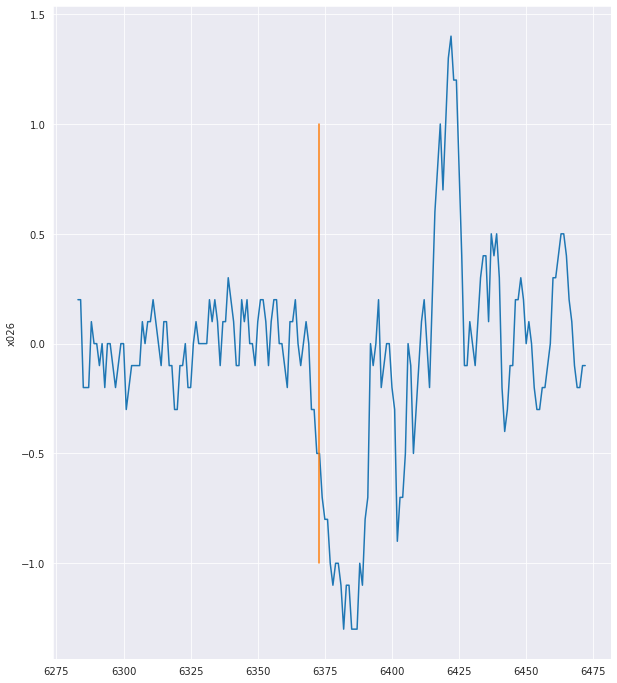

In [51]:
# Лаг 30?
feat = "х026"
plt.figure(figsize=(10, 12))
sns.lineplot(data=val_data[6373 - 100:6373 + 100].diff(10), x=val_data[6373 - 100:6373 + 100].index, y=feat)

plt.plot([6373, 6373], [-1, 1])

plt.show()

### MODELING

In [7]:
train_data_diff = train_data.drop(['Параметр', 'Маркер'], axis=1).diff(1)
train_data_diff.rename(columns={col: col + "_diff" for col in train_data_diff.columns}, inplace=True)
train = pd.concat([train_data, train_data_diff], axis=1)

val_data_diff = val_data.drop(['Параметр', 'Маркер'], axis=1).diff(1)
val_data_diff.rename(columns={col: col + "_diff" for col in val_data_diff.columns}, inplace=True)
val = pd.concat([val_data, val_data_diff], axis=1)
val

,Параметр,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х062_diff,х063_diff,х064_diff,х065_diff,х066_diff,х067_diff,х068_diff,х069_diff,х070_diff,х071_diff
0,01.09.2019,189.346,22.1,50.030,50.009,3002.125,50.008,69.1,61.7,63.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.09.2019 0:01,189.346,22.1,50.014,49.995,3000.567,49.996,69.8,61.5,63.2,...,0.0,0.0,0.0,0.0,0.1,0.0,-0.1,0.0,0.0,0.0
2,01.09.2019 0:02,189.346,22.1,50.032,50.011,3002.355,50.010,69.3,61.5,63.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
3,01.09.2019 0:03,189.346,22.1,50.025,50.006,3001.755,50.006,69.7,61.8,63.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01.09.2019 0:04,189.346,22.1,50.036,50.018,3002.030,50.018,69.5,62.4,64.1,...,0.1,0.1,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6868,05.09.2019 18:28,190.401,23.9,50.025,50.006,3001.563,50.003,67.3,62.4,64.1,...,0.0,0.0,0.0,0.1,0.0,0.0,-0.1,0.0,0.0,0.0
6869,05.09.2019 18:29,190.401,23.9,50.019,49.999,3000.999,50.000,73.8,62.5,64.2,...,0.0,0.0,0.0,-0.1,-0.1,0.0,0.0,0.0,0.0,0.0
6870,05.09.2019 18:30,190.401,23.9,50.034,50.013,3001.733,50.013,74.6,62.5,64.3,...,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
6871,05.09.2019 18:31,190.401,23.9,50.031,50.011,3001.939,50.011,74.7,62.3,64.1,...,0.0,-0.1,0.0,0.0,-3.4,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool

In [9]:
X = train.drop(['Параметр', 'Маркер'], axis=1).reset_index(drop=True)
y = train[['Маркер']].reset_index(drop=True)

y[y['Маркер'] == 2] = 1
y[y['Маркер'] == 4] = 3

In [10]:
# tscv = TimeSeriesSplit(2)
#
# for train_index, test_index in tscv.split(X):
#
#     X_train, X_test = X.loc[train_index], X.loc[test_index]
#     y_train, y_test = y.loc[train_index], y.loc[test_index]
# rfr = RandomForestClassifier()
# rfr.fit(X, y)
# pred = rfr.predict(X_val)

In [11]:
X_val, y_val = val.drop(['Параметр', 'Маркер'], axis=1).reset_index(drop=True), val[['Маркер']]

y_val[y_val['Маркер'] == 2] = 1
y_val[y_val['Маркер'] == 4] = 3

In [12]:
# pred = rfr.predict(X_val)

In [13]:
model = CatBoostClassifier(verbose=200, od_type="Iter", od_wait=20, depth=9)

model.fit(X, y, eval_set=(X_val, y_val))

Learning rate set to 0.114197
0:	learn: 0.2753870	test: 0.7646885	best: 0.7646885 (0)	total: 85.3ms	remaining: 1m 25s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7500753954
bestIteration = 1

Shrink model to first 2 iterations.


In [14]:
pred = model.predict(X_val)

In [15]:
Counter(pred)

Counter({1: 2979, 3: 3894})

In [16]:
#Counter({1: 4080, 3: 2793})

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_val, pred)

0.4469663902226102

In [19]:
test_data = pd.read_csv("Задача3. Датасет 3. Контрольный для участников.csv", encoding="cp1251", sep=';', skiprows=[1])
# test = test.rename(columns={'Unnamed: 0': "Параметр"})
# test['Параметр'] = pd.to_datetime(test['Параметр'], infer_datetime_format=True)

# test.rename(columns={test.columns[0]: "Параметр"}, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [80]:
test_data.dropna()

,Unnamed: 0,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х062,х063,х064,х065,х066,х067,х068,х069,х070,х071
0,06.10.2019 13:00,131.683,12.1,50.036,50.015,3001.731,50.014,66.0,66.1,67.6,...,60.0,70.4,68.9,66.3,66.7,3276.7,35.7,29.9,41.9,18.9
1,06.10.2019 13:01,131.683,12.1,50.035,50.014,3001.733,50.014,66.4,66.2,67.7,...,60.1,70.4,68.9,66.3,66.8,3276.7,35.8,30.0,41.9,18.9
2,06.10.2019 13:02,131.683,12.1,50.036,50.014,3001.731,50.012,66.6,66.4,67.8,...,60.1,70.4,68.9,66.3,66.7,3276.7,35.7,30.1,41.9,18.9
3,06.10.2019 13:03,131.683,12.1,50.015,49.994,3000.575,49.994,66.7,66.5,67.9,...,60.1,70.5,69.0,66.3,66.8,3276.7,35.6,30.1,41.9,18.8
4,06.10.2019 13:04,131.683,12.1,50.011,49.990,3000.561,49.991,66.7,66.4,67.9,...,60.1,70.5,69.0,66.3,66.8,3276.7,35.7,30.2,41.9,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606,11.10.2019 3:06,191.527,8.5,50.051,50.030,3002.107,50.030,73.5,66.7,66.6,...,60.8,71.4,69.0,66.3,66.6,3276.7,34.2,29.7,42.3,15.9
6607,11.10.2019 3:07,191.527,8.5,50.024,50.003,3001.733,50.003,73.6,66.6,66.6,...,60.8,71.3,69.0,66.3,66.8,3276.7,34.3,29.7,42.4,15.9
6608,11.10.2019 3:08,191.527,8.5,50.026,50.005,3001.697,50.006,73.8,66.6,66.6,...,60.8,71.3,69.0,66.3,66.7,3276.7,34.2,29.7,42.3,15.9
6609,11.10.2019 3:09,191.527,8.5,50.016,49.994,3000.565,49.994,73.7,66.7,66.7,...,60.8,71.3,69.0,66.2,66.7,3276.7,34.4,29.7,42.4,15.9


In [20]:
test = test_data.loc[:, 'х001':'х071'].dropna()

test_data_diff = test.diff(1)
test_data_diff.rename(columns={col: col + "_diff" for col in test_data_diff.columns}, inplace=True)
test = pd.concat([test, test_data_diff], axis=1)
test

,х001,х002,х003,х004,х005,х006,х007,х008,х009,х010,...,х062_diff,х063_diff,х064_diff,х065_diff,х066_diff,х067_diff,х068_diff,х069_diff,х070_diff,х071_diff
0,131.683,12.1,50.036,50.015,3001.731,50.014,66.0,66.1,67.6,63.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131.683,12.1,50.035,50.014,3001.733,50.014,66.4,66.2,67.7,63.7,...,0.1,0.0,0.0,0.0,0.1,0.0,0.1,0.1,0.0,0.0
2,131.683,12.1,50.036,50.014,3001.731,50.012,66.6,66.4,67.8,63.8,...,0.0,0.0,0.0,0.0,-0.1,0.0,-0.1,0.1,0.0,0.0
3,131.683,12.1,50.015,49.994,3000.575,49.994,66.7,66.5,67.9,63.8,...,0.0,0.1,0.1,0.0,0.1,0.0,-0.1,0.0,0.0,-0.1
4,131.683,12.1,50.011,49.990,3000.561,49.991,66.7,66.4,67.9,63.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606,191.527,8.5,50.051,50.030,3002.107,50.030,73.5,66.7,66.6,62.8,...,0.0,0.0,0.0,0.0,0.2,0.0,-0.1,0.0,0.0,0.0
6607,191.527,8.5,50.024,50.003,3001.733,50.003,73.6,66.6,66.6,62.8,...,0.0,-0.1,0.0,0.0,0.2,0.0,0.1,0.0,0.1,0.0
6608,191.527,8.5,50.026,50.005,3001.697,50.006,73.8,66.6,66.6,62.8,...,0.0,0.0,0.0,0.0,-0.1,0.0,-0.1,0.0,-0.1,0.0
6609,191.527,8.5,50.016,49.994,3000.565,49.994,73.7,66.7,66.7,62.9,...,0.0,0.0,0.0,-0.1,0.0,0.0,0.2,0.0,0.1,0.0


In [21]:
pred_test = model.predict(test)
Counter(pred_test)

Counter({1: 6550, 3: 61})

In [83]:
a = pd.DataFrame(data=pred_test, columns=["pred"])
a[a["pred"] == 3]

,pred
6127,3
6128,3
6129,3
6131,3
6132,3
...,...
6571,3
6572,3
6573,3
6574,3


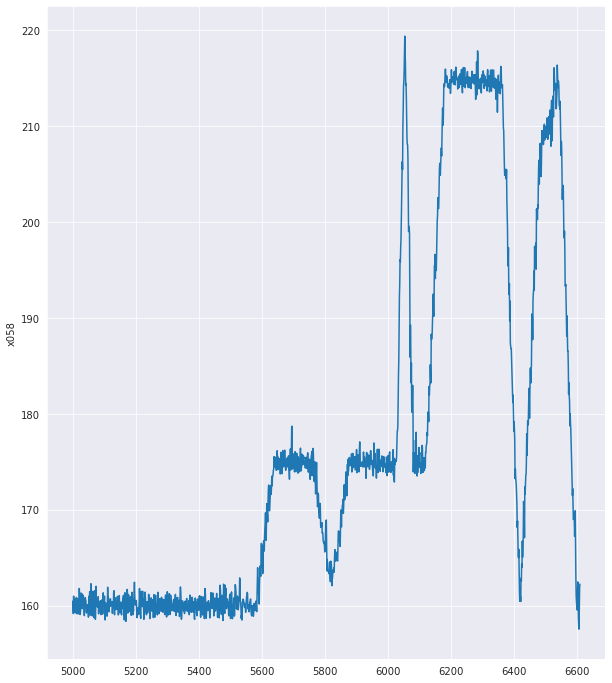

In [84]:
plt.figure(figsize=(10, 12))
sns.lineplot(data=test_data[5000:], x=test_data[5000:].index, y="х058")

plt.show()

In [24]:
sample_submission = pd.read_csv("sample_submission_3.csv", encoding="cp1251", sep=';')

In [25]:
sample_submission

,Unnamed: 0,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х063,х064,х065,х066,х067,х068,х069,х070,х071,Маркер
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01.09.2019,189.346,22.1,50.03,50.009,3002.125,50.008,69.1,61.7,63.4,...,72.3,71.3,68.5,68.7,3276.7,39.1,41.9,42.7,25.2,1.0


In [30]:
ans = test_data.copy()
ans['Маркер'] = 1
ans.loc[6500, "Маркер"] = 2
ans.loc[8050, "Маркер"] = 4
ans.loc[8050, "Unnamed: 0"] = "11.10.2019 6:19"

ans.shape

(36661, 73)

In [31]:
res = pd.concat([sample_submission, ans])
res.shape

(36664, 73)

In [32]:
res.reset_index(drop=True).to_csv("ds3_.csv", index=False, sep=';', encoding='cp1251')

In [33]:
a = pd.read_csv("ds3_.csv", encoding='cp1251', sep=";")

In [34]:
a

,Unnamed: 0,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х063,х064,х065,х066,х067,х068,х069,х070,х071,Маркер
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01.09.2019,189.346,22.1,50.030,50.009,3002.125,50.008,69.1,61.7,63.4,...,72.3,71.3,68.5,68.7,3276.7,39.1,41.9,42.7,25.2,1.0
3,06.10.2019 13:00,131.683,12.1,50.036,50.015,3001.731,50.014,66.0,66.1,67.6,...,70.4,68.9,66.3,66.7,3276.7,35.7,29.9,41.9,18.9,1.0
4,06.10.2019 13:01,131.683,12.1,50.035,50.014,3001.733,50.014,66.4,66.2,67.7,...,70.4,68.9,66.3,66.8,3276.7,35.8,30.0,41.9,18.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
36660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
36661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
36662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [90]:
import datetime


def obtain_params(df):
    mode_2 = datetime.datetime.strptime(df[df['Маркер'] == 2]['Параметр'].tolist()[0], '%d.%m.%Y %H:%M')
    mode_4 = datetime.datetime.strptime(df[df['Маркер'] == 4]['Параметр'].tolist()[0], '%d.%m.%Y %H:%M')
    return mode_2, mode_4


def compute_metric(pred, gt):
    p2, p4 = obtain_params(pred)
    g2, g4 = obtain_params(gt)
    diff2 = abs(g2 - p2).total_seconds()
    diff4 = abs(g4 - p4).total_seconds()
    score = (diff2 + diff4) / 2
    return score


a.drop([0, 1], inplace=True)  # если в таблице больше или меньше строк пустые, нужно поменять
a.rename(columns={a.columns[0]: "Параметр"}, inplace=True)
a.reset_index(drop=True, inplace=True)
metric = compute_metric(a, a)
print(f"Average difference: {metric}")

Average difference: 0.0


In [103]:
pred_df = pd.DataFrame(data=pred, columns=["Маркер"])
pred_df['Параметр'] = val_data['Параметр']
pred_df.loc[6522, "Маркер"] = 2
pred_df.loc[6872, "Маркер"] = 4

In [104]:
metric = compute_metric(pred_df, val_data)
print(f"Average difference: {metric}")

Average difference: 4470.0


In [123]:
val_data

,Параметр,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х063,х064,х065,х066,х067,х068,х069,х070,х071,Маркер
0,01.09.2019,189.346,22.1,50.030,50.009,3002.125,50.008,69.1,61.7,63.4,...,72.3,71.3,68.5,68.7,3276.7,39.1,41.9,42.7,25.2,1
1,01.09.2019 0:01,189.346,22.1,50.014,49.995,3000.567,49.996,69.8,61.5,63.2,...,72.3,71.3,68.5,68.8,3276.7,39.0,41.9,42.7,25.2,1
2,01.09.2019 0:02,189.346,22.1,50.032,50.011,3002.355,50.010,69.3,61.5,63.2,...,72.3,71.3,68.5,68.8,3276.7,39.1,41.9,42.7,25.2,1
3,01.09.2019 0:03,189.346,22.1,50.025,50.006,3001.755,50.006,69.7,61.8,63.6,...,72.3,71.3,68.5,68.8,3276.7,39.1,41.9,42.7,25.2,1
4,01.09.2019 0:04,189.346,22.1,50.036,50.018,3002.030,50.018,69.5,62.4,64.1,...,72.4,71.2,68.5,68.8,3276.7,39.1,41.9,42.7,25.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6868,05.09.2019 18:28,190.401,23.9,50.025,50.006,3001.563,50.003,67.3,62.4,64.1,...,72.2,72.4,69.7,69.8,3276.7,40.7,43.5,44.7,27.0,3
6869,05.09.2019 18:29,190.401,23.9,50.019,49.999,3000.999,50.000,73.8,62.5,64.2,...,72.2,72.4,69.6,69.7,3276.7,40.7,43.5,44.7,27.0,3
6870,05.09.2019 18:30,190.401,23.9,50.034,50.013,3001.733,50.013,74.6,62.5,64.3,...,72.3,72.4,69.6,69.8,3276.7,40.7,43.5,44.7,27.0,3
6871,05.09.2019 18:31,190.401,23.9,50.031,50.011,3001.939,50.011,74.7,62.3,64.1,...,72.2,72.4,69.6,66.4,3276.7,40.7,43.5,44.7,27.0,3


In [126]:
val_data[val_data["Маркер"] == 2]

,Параметр,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х063,х064,х065,х066,х067,х068,х069,х070,х071,Маркер
6373,05.09.2019 10:13,190.401,23.0,50.015,50.004,3000.596,50.003,62.7,67.7,75.7,...,70.8,71.8,69.0,67.4,3276.7,39.4,42.4,43.7,26.1,2


6523

In [140]:
import optuna
from optuna.samplers import TPESampler
import random

sampler = TPESampler(seed=13)

In [187]:
def objective(trial):
    params = {
        "num_leaves": trial.suggest_int("num_leaves", 2, 500),
        "n_estimators": trial.suggest_int("n_estimators", 1000, 5000),
        "max_depth": trial.suggest_int('max_depth', 2, 16),
        # "eval_metric": "Accuracy",
        "loss_function": "Logloss",
        "learning_rate": trial.suggest_uniform('learning_rate', 0.00001, 0.99),
        "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 2, 300),
        "grow_policy": "Lossguide",
        "od_type": "Iter",
        "od_wait": 10,
        "task_type": "GPU",
        "verbose": 100

    }
    # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
    train_pool = Pool(X, y)
    val_pool = Pool(X_val, y_val)

    model = CatBoostClassifier(**params)

    model.fit(train_pool, eval_set=val_pool)
    #     score = cv(train_pool, params, fold_count=5, shuffle=True, plot=False, verbose=25)
    y_val_pred = model.predict(val_pool)

    pred_df = pd.DataFrame(data=y_val_pred, columns=["Маркер"])
    pred_df['Параметр'] = val_data['Параметр']
    y_val_ = val[['Маркер']].copy()
    y_val_['Параметр'] = val_data['Параметр']
    ind = pred_df[6000:][pred_df['Маркер'] == 3].index[0]
    pred_df.loc[ind, "Маркер"] = 2
    pred_df.loc[6872, "Маркер"] = 4

    score = compute_metric(y_val_, pred_df)
    print(score)
    return score


study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=20)
params_cat = study.best_params

[I 2022-11-02 01:35:37,812] A new study created in memory with name: no-name-44e37c67-68e3-4122-80ad-efc251170351
[W 2022-11-02 01:35:37,819] Trial 0 failed because of the following error: CatBoostError("Invalid loss_function='Precision': for classifier use Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll or custom objective object")
Traceback (most recent call last):
  File "/home/dm/anaconda3/lib/python3.8/site-packages/optuna/study/_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-187-f03e5f736596>", line 23, in objective
    model.fit(train_pool, eval_set=val_pool)
  File "/home/dm/anaconda3/lib/python3.8/site-packages/catboost/core.py", line 4714, in fit
    CatBoostClassifier._check_is_compatible_loss(params['loss_function'])
  File "/home/dm/anaconda3/lib/python3.8/site-packages/catboost/core.py", line 5066, in _check_is_compatible_loss
    raise CatBoostError("Invalid loss_function='{}': for classifier use "
_catboost.CatBoostE

CatBoostError: Invalid loss_function='Precision': for classifier use Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll or custom objective object

In [182]:
params_cat["grow_policy"] = "Lossguide"
params_cat

{'num_leaves': 233,
 'n_estimators': 2425,
 'max_depth': 15,
 'learning_rate': 0.20606456867872056,
 'min_data_in_leaf': 115,
 'grow_policy': 'Lossguide'}

In [183]:
model = CatBoostClassifier(**params_cat, verbose=10, od_type="Iter", od_wait=20, task_type="GPU")

model.fit(X, y, eval_set=(X_val, y_val))

0:	learn: 0.1070059	test: 0.9436035	best: 0.9436035 (0)	total: 17.6ms	remaining: 42.6s
10:	learn: 0.0000258	test: 1.3189902	best: 0.8817476 (5)	total: 251ms	remaining: 55s
20:	learn: 0.0000053	test: 1.5456721	best: 0.8817476 (5)	total: 500ms	remaining: 57.2s
bestTest = 0.8817475595
bestIteration = 5
Shrink model to first 6 iterations.


In [184]:
pred_test = model.predict(test)
Counter(pred_test)

Counter({1: 6611})

==========================================
8 глубина
ans.loc[6147, "Маркер"] = 2
ans.loc[8050, "Маркер"] = 4
ans.loc[8050, "Unnamed: 0"] = "11.10.2019 7:00"


SCORE 11760

================================================

ans.loc[6200, "Маркер"] = 2
ans.loc[8050, "Маркер"] = 4
ans.loc[8050, "Unnamed: 0"] = "11.10.2019 7:20"

SCORE 11760

=================================================

ans.loc[6300, "Маркер"] = 2
ans.loc[8050, "Маркер"] = 4
ans.loc[8050, "Unnamed: 0"] = "11.10.2019 7:20"

SCORE 7770

==================================================


ans.loc[6500, "Маркер"] = 2
ans.loc[8050, "Маркер"] = 4
ans.loc[8050, "Unnamed: 0"] = "11.10.2019 7:20"

SCORE 2430

====================================================

Глубина 9
ans.loc[6579, "Маркер"] = 2
ans.loc[8050, "Маркер"] = 4
ans.loc[8050, "Unnamed: 0"] = "11.10.2019 7:20"

SCORE 4800